In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


file_path = 'modified_california_counties.csv'
data = pd.read_csv(file_path)


data.drop(['State'], axis=1, inplace=True)



,County,Urban_Percentage,Total_Population,Housing_Units,Median_Family_Income,Population_Half_Percent,Low_Income_Half_Percent,Vehicle_Half_Percent,Population_1_Percent,Low_Income_1_Percent,...,Obese,Obese Low Income,Veggie,Veggie Low Income,Fruit,Fruit Low Income,Fast Food,Fast Food Low Income,Soda,Soda Low Income
0,Alameda,98.333333,1510271.0,545138.0,112924.390449,43.817633,8.587201,0.997040,8.869335,1.176875,...,25.96,35.65,64.17,56.45,61.03,62.00,57.01,61.35,5.92,9.83
1,Alpine,0.000000,1175.0,497.0,82813.000000,100.000000,35.574468,2.553191,100.000000,35.574468,...,28.71,34.18,60.04,52.53,52.28,55.99,54.00,54.74,7.02,16.76
2,Amador,0.000000,38091.0,14569.0,74668.222222,86.653015,21.842430,1.714316,67.580268,16.702108,...,28.71,34.18,60.04,52.53,52.28,55.99,54.00,54.74,7.02,16.76
3,Butte,74.509804,220000.0,87618.0,65078.200000,73.602727,28.130455,1.791818,41.063636,13.905000,...,26.67,37.50,60.91,50.94,53.07,51.65,61.37,63.28,7.88,18.46
4,Calaveras,20.000000,45578.0,18886.0,74943.444444,87.401817,27.188556,0.820571,71.247093,22.534995,...,28.71,34.18,60.04,52.53,52.28,55.99,54.00,54.74,7.02,16.76


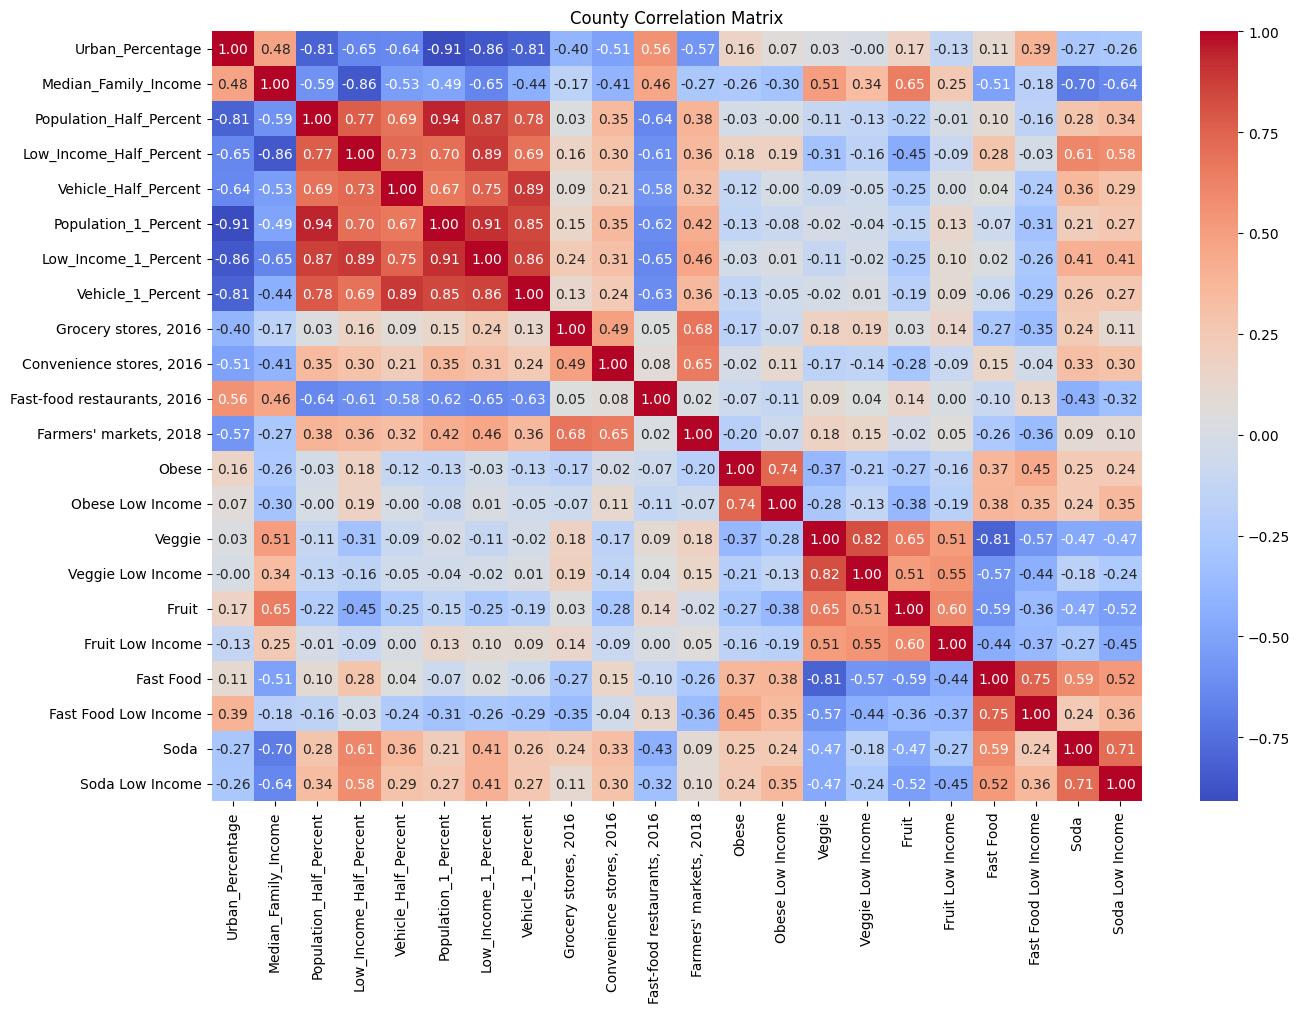

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

data_corr = data.drop(['County','Total_Population','Housing_Units'], axis=1)

corr_matrix = data_corr.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('County Correlation Matrix')
plt.savefig(f'County_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


Top 5 features most correlated with Obese:
Index(['Fast Food Low Income', 'Veggie', 'Fast Food', 'Fruit ',
       'Median_Family_Income'],
      dtype='object')


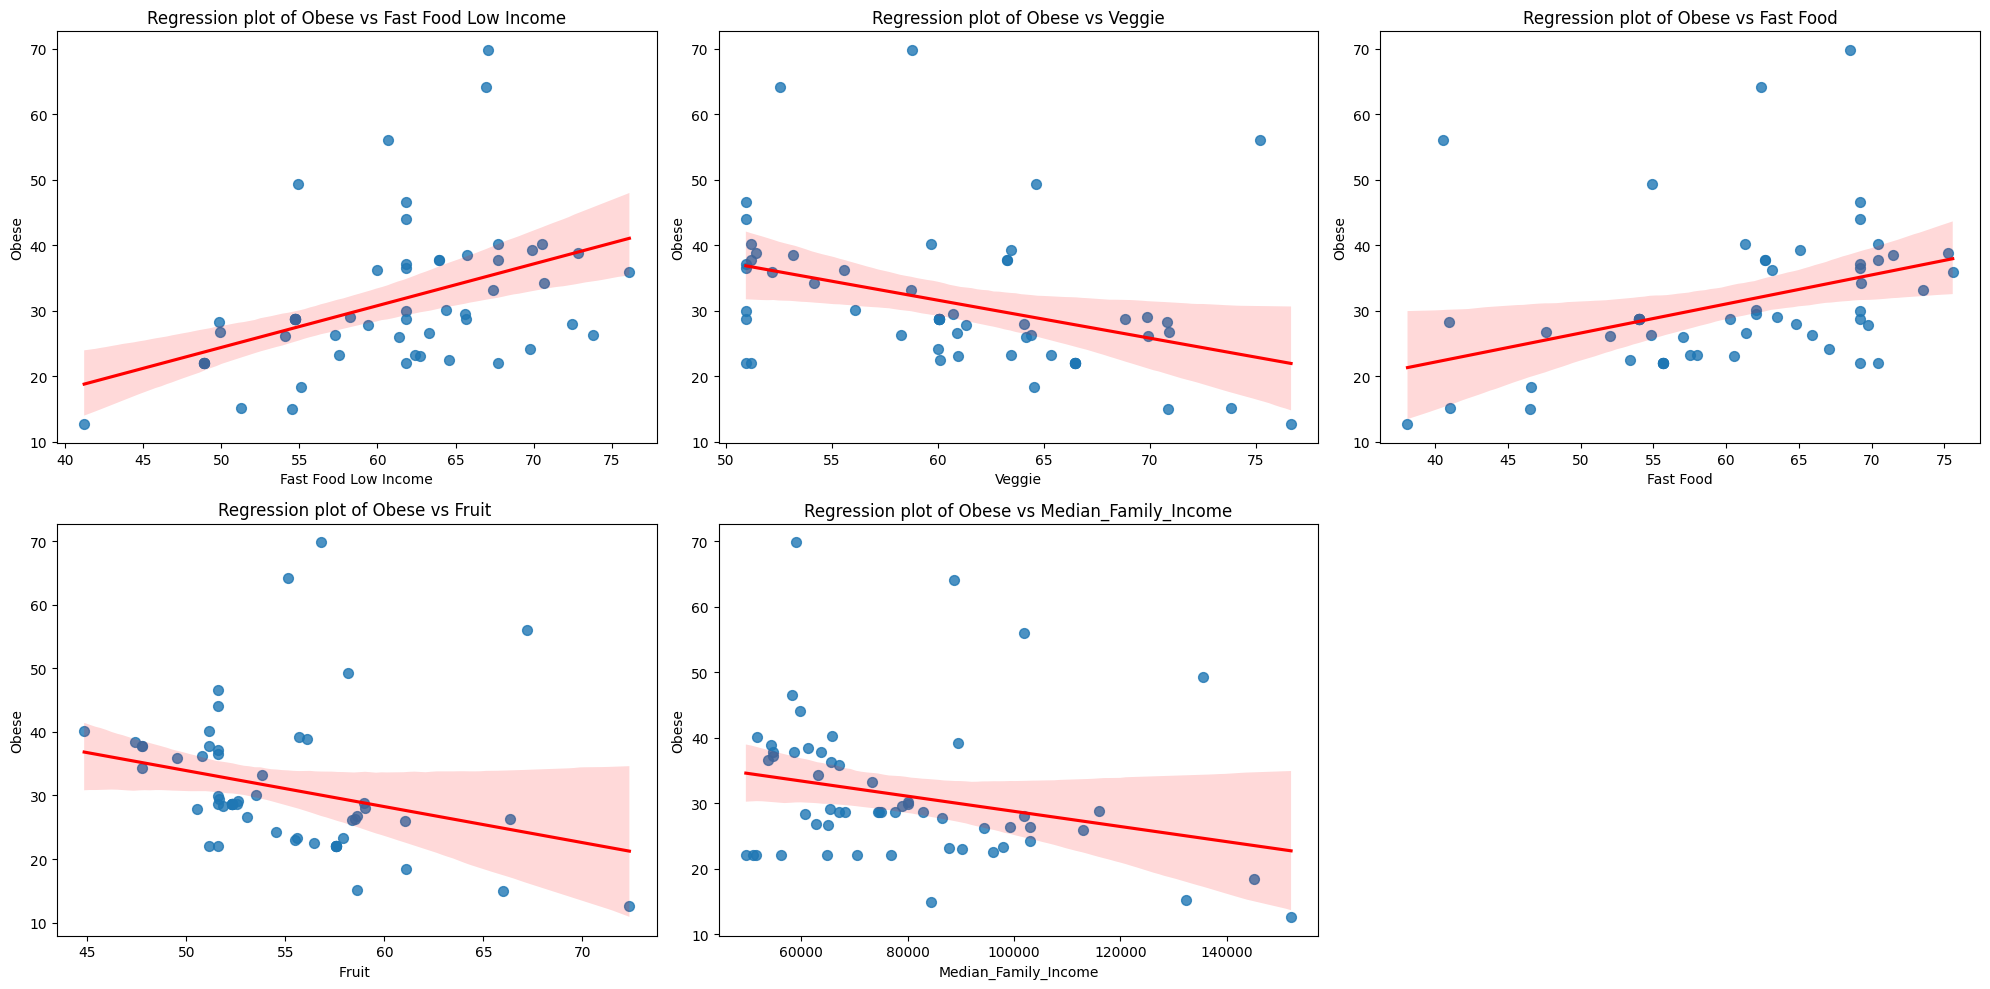

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_obese = corr_matrix['Obese'].abs().sort_values(ascending=False)

top_5_features = correlation_with_obese.index[2:7]  # Skip the first one as it is 'Obese' itself

print("Top 5 features most correlated with Obese:")
print(top_5_features)

plt.figure(figsize=(20, 10))
for i, feature in enumerate(top_5_features):
    plt.subplot(2, 3, i + 1)
    sns.regplot(data=data, x=feature, y='Obese', scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'Regression plot of Obese vs {feature}')
    plt.savefig(f'Regression_plot_of_Obese_vs_{feature}.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


Low Income

In [ ]:

general_vars = ['Veggie', 'Fruit ', 'Fast Food', 'Soda ']
low_income_vars = ['Veggie Low Income', 'Fruit Low Income', 'Fast Food Low Income', 'Soda Low Income']


general_corrs = data[general_vars + ['Obese']].corr()['Obese'].drop('Obese')


low_income_corrs = data[low_income_vars + ['Obese Low Income']].corr()['Obese Low Income'].drop('Obese Low Income')


comparison_corrs = pd.DataFrame({
    'General Population': general_corrs,
    'Low Income Population': low_income_corrs
})


comparison_corrs


,General Population,Low Income Population
Fast Food,0.373496,NaN
Fast Food Low Income,NaN,0.346528
Fruit,-0.268179,NaN
Fruit Low Income,NaN,-0.188160
Soda,0.245128,NaN
Soda Low Income,NaN,0.354790
Veggie,-0.374767,NaN
Veggie Low Income,NaN,-0.130997


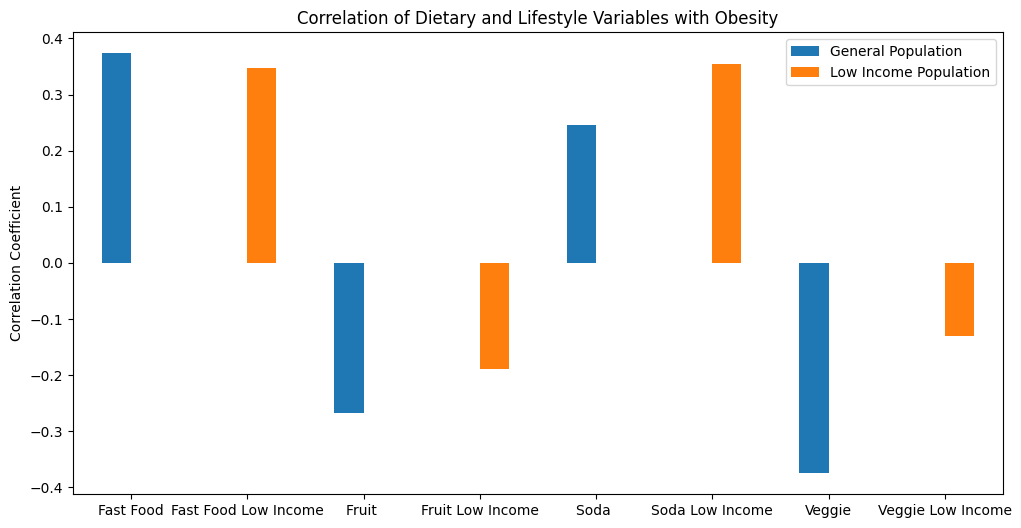

In [ ]:
import matplotlib.pyplot as plt

# Plot comparison of correlations
comparison_corrs.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation of Dietary and Lifestyle Variables with Obesity')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=0)
plt.show()


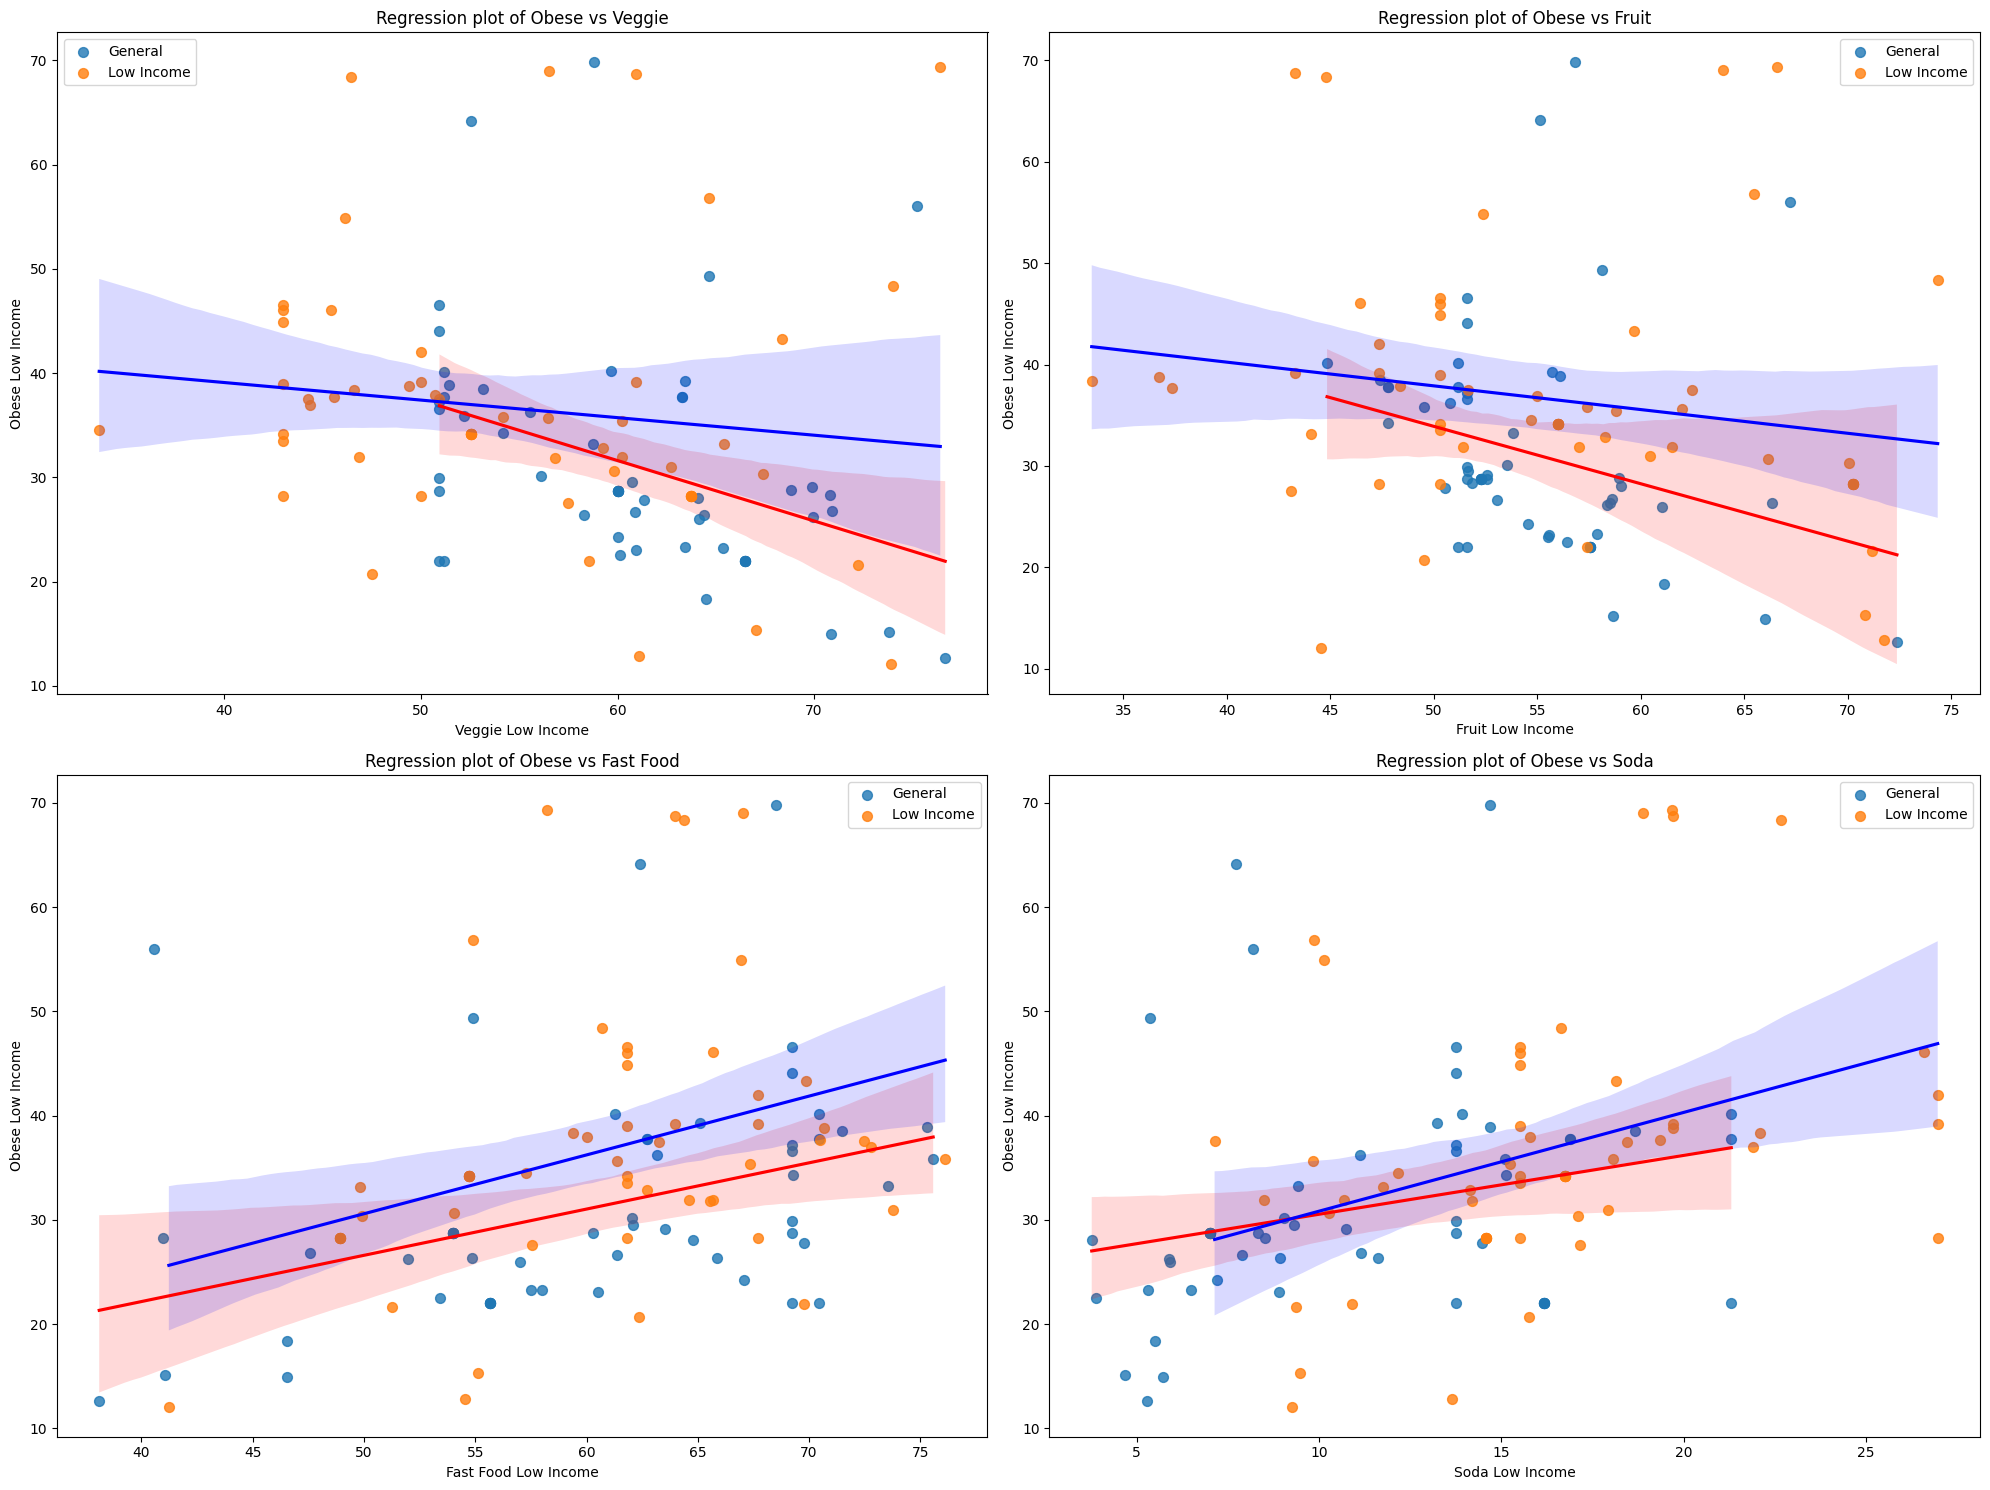

In [ ]:
plt.figure(figsize=(20, 15))

# Veggie
plt.subplot(2, 2, 1)
sns.regplot(data=data, x='Veggie', y='Obese', scatter_kws={'s': 50}, line_kws={'color': 'red'}, label='General')
sns.regplot(data=data, x='Veggie Low Income', y='Obese Low Income', scatter_kws={'s': 50}, line_kws={'color': 'blue'}, label='Low Income')
plt.title('Regression plot of Obese vs Veggie')
plt.legend()

# Fruit
plt.subplot(2, 2, 2)
sns.regplot(data=data, x='Fruit ', y='Obese', scatter_kws={'s': 50}, line_kws={'color': 'red'}, label='General')
sns.regplot(data=data, x='Fruit Low Income', y='Obese Low Income', scatter_kws={'s': 50}, line_kws={'color': 'blue'}, label='Low Income')
plt.title('Regression plot of Obese vs Fruit')
plt.legend()

# Fast Food
plt.subplot(2, 2, 3)
sns.regplot(data=data, x='Fast Food', y='Obese', scatter_kws={'s': 50}, line_kws={'color': 'red'}, label='General')
sns.regplot(data=data, x='Fast Food Low Income', y='Obese Low Income', scatter_kws={'s': 50}, line_kws={'color': 'blue'}, label='Low Income')
plt.title('Regression plot of Obese vs Fast Food')
plt.legend()

# Soda
plt.subplot(2, 2, 4)
sns.regplot(data=data, x='Soda ', y='Obese', scatter_kws={'s': 50}, line_kws={'color': 'red'}, label='General')
sns.regplot(data=data, x='Soda Low Income', y='Obese Low Income', scatter_kws={'s': 50}, line_kws={'color': 'blue'}, label='Low Income')
plt.title('Regression plot of Obese vs Soda')
plt.legend()

plt.tight_layout()
plt.show()


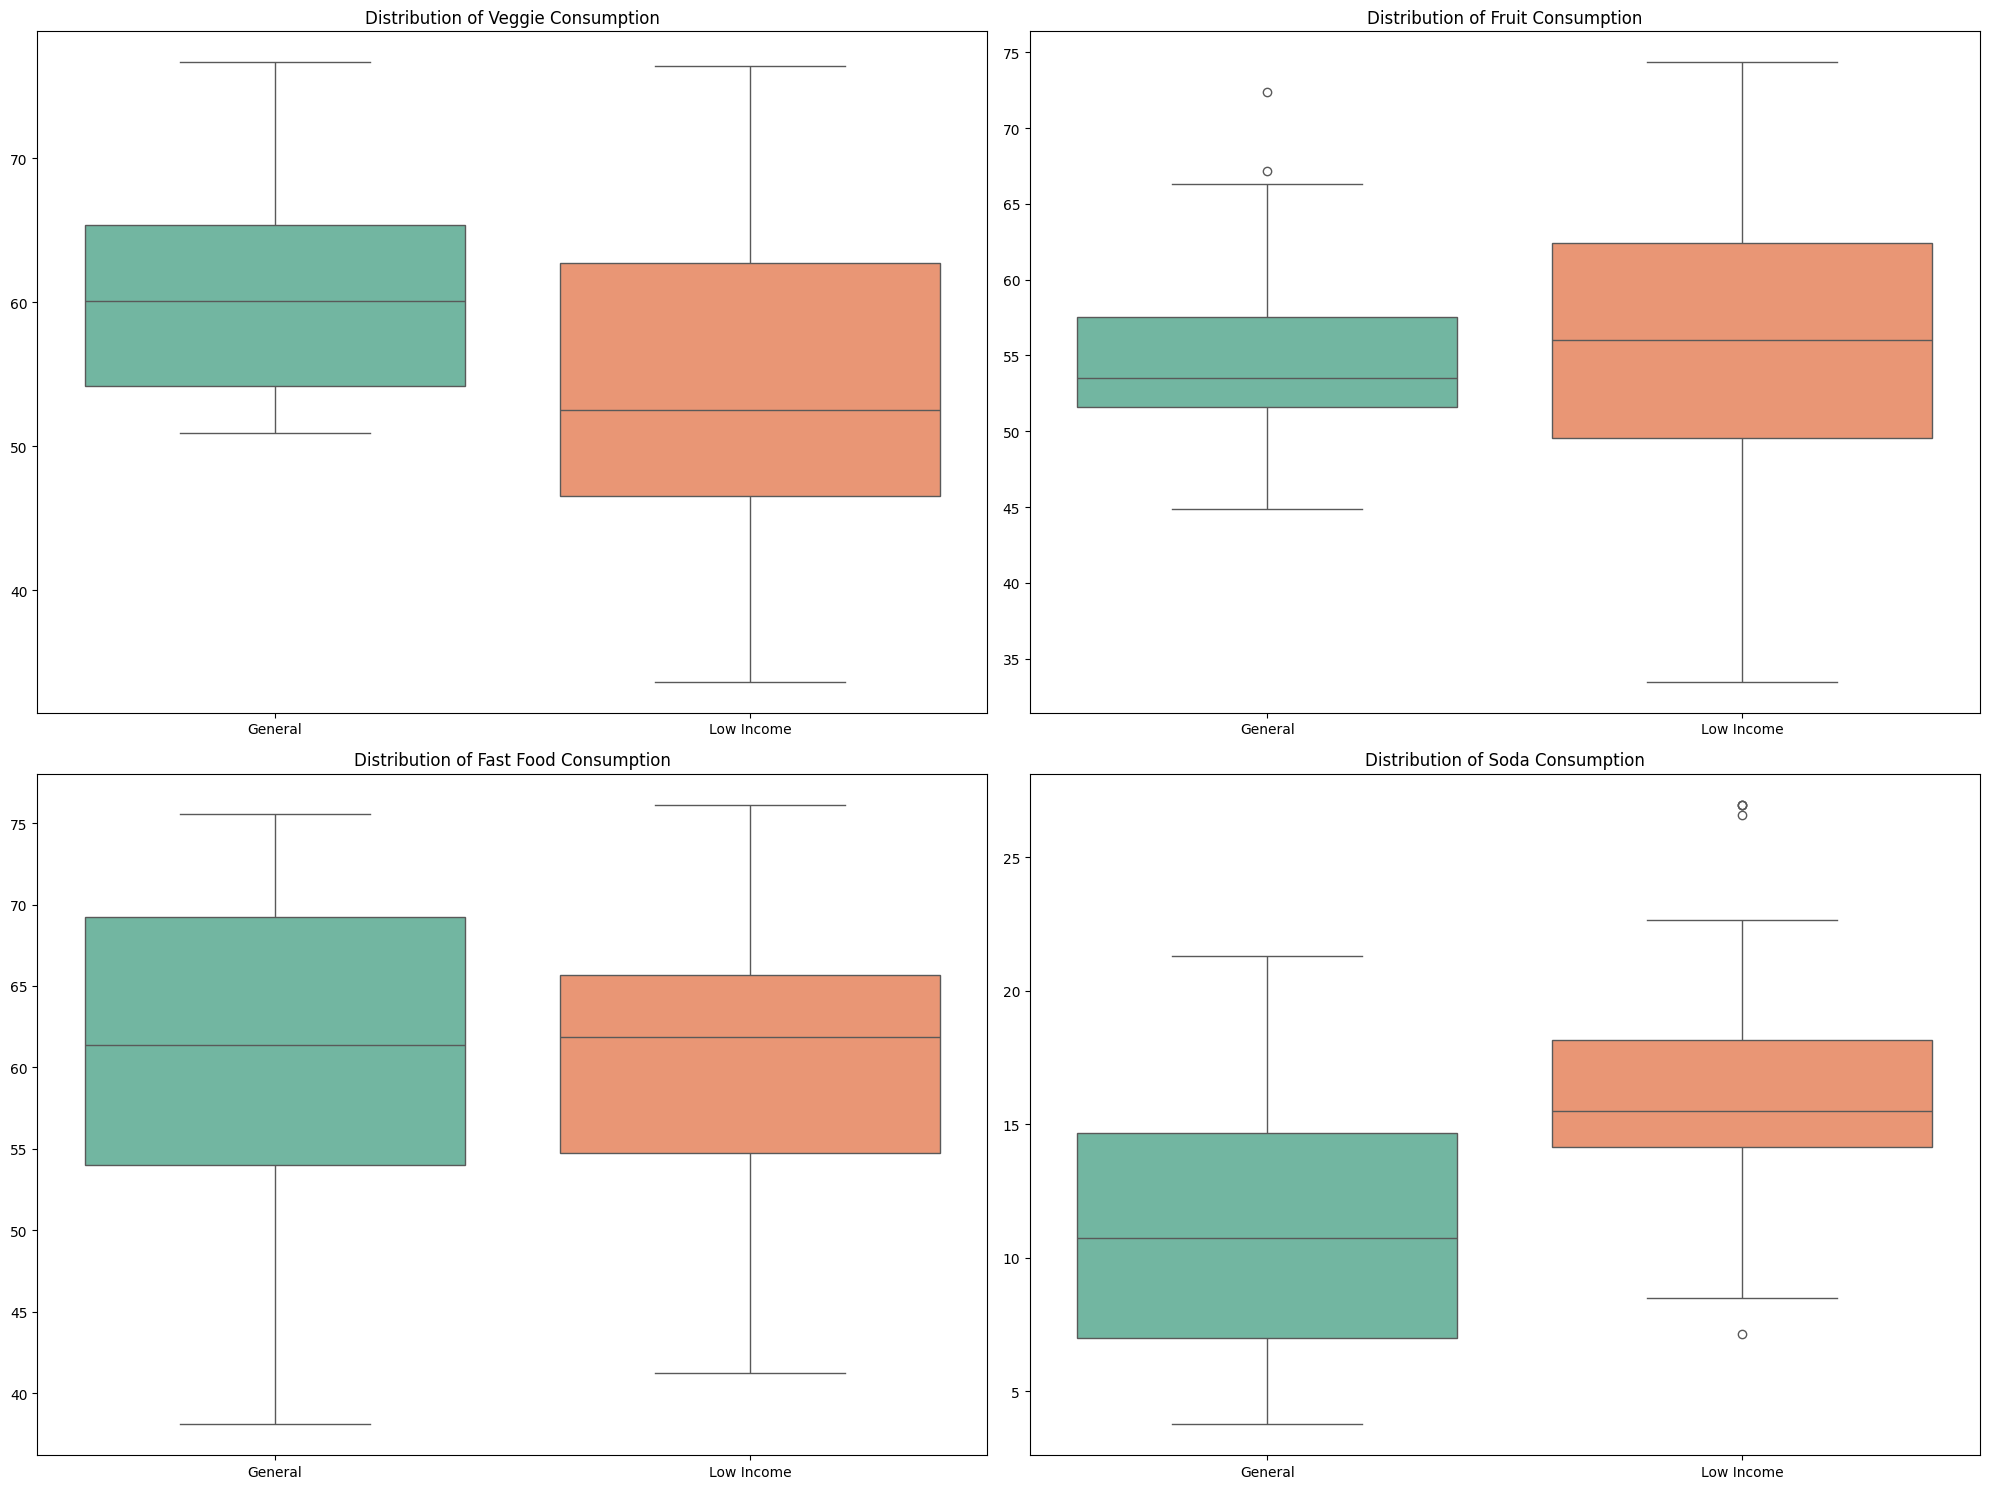

In [ ]:
plt.figure(figsize=(20, 15))

# Veggie
plt.subplot(2, 2, 1)
sns.boxplot(data=[data['Veggie'], data['Veggie Low Income']], palette="Set2")
plt.xticks([0, 1], ['General', 'Low Income'])
plt.savefig(f'Regression_plot_of_Obese_vs_Veggie.png', dpi=300, bbox_inches='tight')
plt.title('Distribution of Veggie Consumption')

# Fruit
plt.subplot(2, 2, 2)
sns.boxplot(data=[data['Fruit '], data['Fruit Low Income']], palette="Set2")
plt.xticks([0, 1], ['General', 'Low Income'])
plt.savefig(f'Regression_plot_of_Obese_vs_Fruit.png', dpi=300, bbox_inches='tight')
plt.title('Distribution of Fruit Consumption')

# Fast Food
plt.subplot(2, 2, 3)
sns.boxplot(data=[data['Fast Food'], data['Fast Food Low Income']], palette="Set2")
plt.xticks([0, 1], ['General', 'Low Income'])
plt.savefig(f'Regression_plot_of_Obese_vs_Fast_Food.png', dpi=300, bbox_inches='tight')
plt.title('Distribution of Fast Food Consumption')

# Soda
plt.subplot(2, 2, 4)
sns.boxplot(data=[data['Soda '], data['Soda Low Income']], palette="Set2")
plt.xticks([0, 1], ['General', 'Low Income'])
plt.savefig(f'Regression_plot_of_Obese_vs_Soda.png', dpi=300, bbox_inches='tight')
plt.title('Distribution of Soda Consumption')

plt.tight_layout()
plt.show()


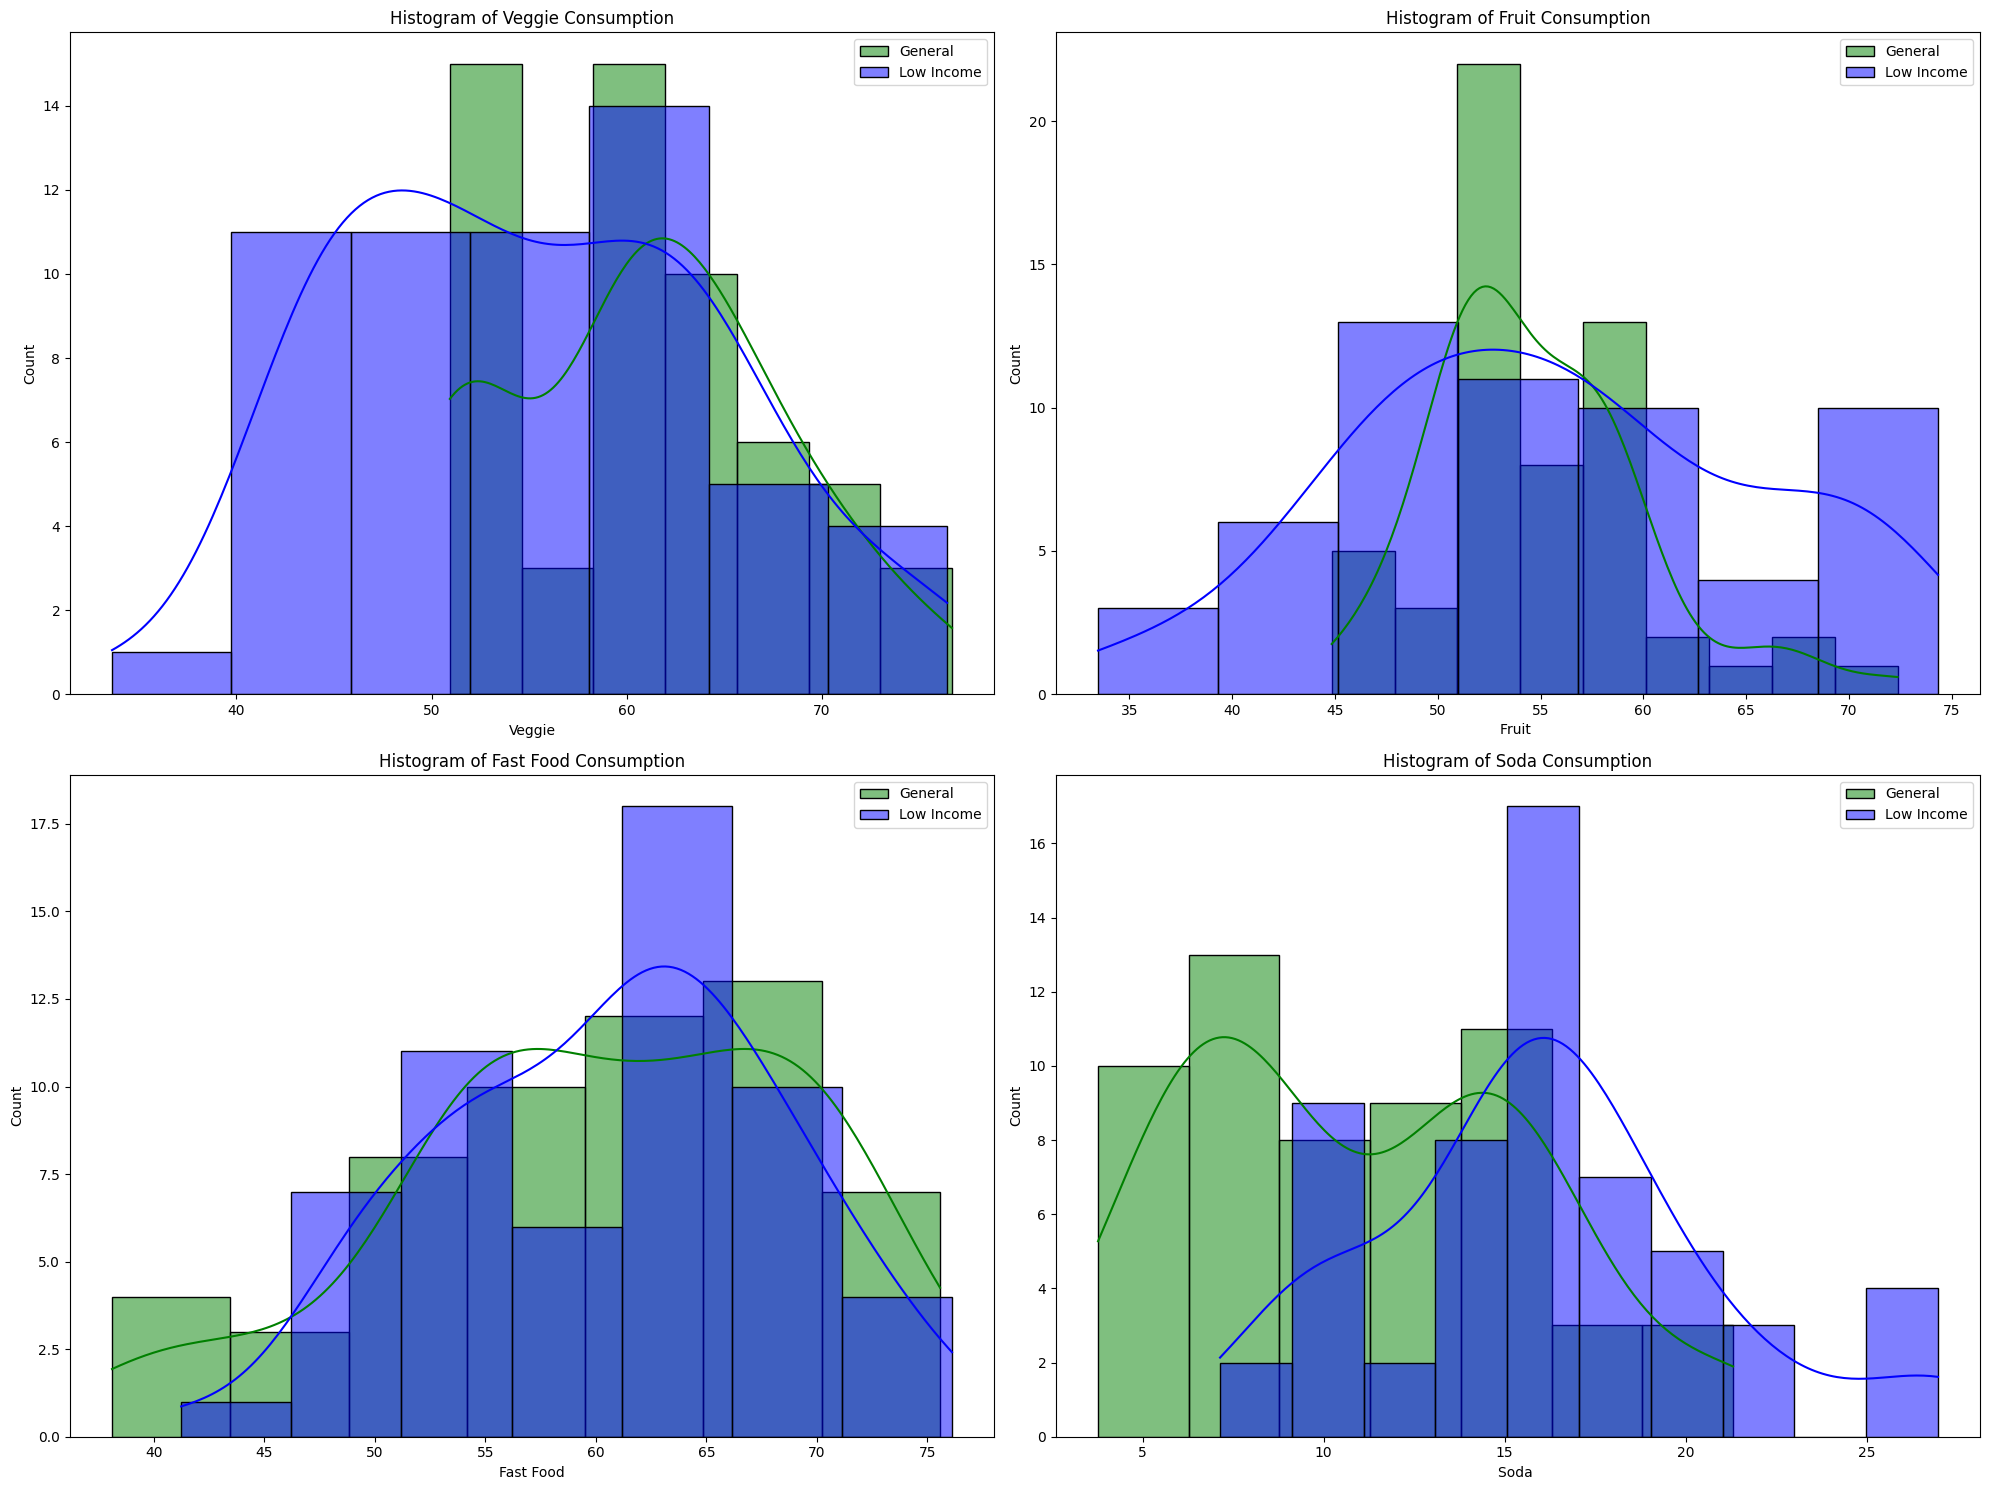

In [ ]:
plt.figure(figsize=(20, 15))

# Veggie
plt.subplot(2, 2, 1)
sns.histplot(data['Veggie'], kde=True, color='green', label='General')
sns.histplot(data['Veggie Low Income'], kde=True, color='blue', label='Low Income')
plt.title('Histogram of Veggie Consumption')
plt.legend()

# Fruit
plt.subplot(2, 2, 2)
sns.histplot(data['Fruit '], kde=True, color='green', label='General')
sns.histplot(data['Fruit Low Income'], kde=True, color='blue', label='Low Income')
plt.title('Histogram of Fruit Consumption')
plt.legend()

# Fast Food
plt.subplot(2, 2, 3)
sns.histplot(data['Fast Food'], kde=True, color='green', label='General')
sns.histplot(data['Fast Food Low Income'], kde=True, color='blue', label='Low Income')
plt.title('Histogram of Fast Food Consumption')
plt.legend()

# Soda
plt.subplot(2, 2, 4)
sns.histplot(data['Soda '], kde=True, color='green', label='General')
sns.histplot(data['Soda Low Income'], kde=True, color='blue', label='Low Income')
plt.title('Histogram of Soda Consumption')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import scipy.stats as stats

# Select relevant columns with corrected names
general_vars = ['Veggie', 'Fruit ', 'Fast Food', 'Soda ']
low_income_vars = ['Veggie Low Income', 'Fruit Low Income', 'Fast Food Low Income', 'Soda Low Income']

# Descriptive statistics for general population
general_stats = data[general_vars].describe().T[['mean', 'std']]
general_stats.columns = ['General Mean', 'General Std']

# Descriptive statistics for low-income population
low_income_stats = data[low_income_vars].describe().T[['mean', 'std']]
low_income_stats.columns = ['Low Income Mean', 'Low Income Std']

# Combine the statistics into one DataFrame
descriptive_stats = pd.concat([general_stats, low_income_stats], axis=1)

descriptive_stats


,General Mean,General Std,Low Income Mean,Low Income Std
Veggie,60.786316,7.063981,NaN,NaN
Fruit,54.864912,5.172253,NaN,NaN
Fast Food,60.274737,9.197030,NaN,NaN
Soda,11.101228,4.741974,NaN,NaN
Veggie Low Income,NaN,NaN,55.037368,9.660320
Fruit Low Income,NaN,NaN,55.733158,9.988974
Fast Food Low Income,NaN,NaN,60.594912,7.625867
Soda Low Income,NaN,NaN,16.053860,4.649454


In [ ]:
# Perform t-tests for each variable
t_test_results = {}
for g_var, li_var in zip(general_vars, low_income_vars):
    t_stat, p_val = stats.ttest_ind(data[g_var], data[li_var], nan_policy='omit')
    t_test_results[g_var] = {'t-statistic': t_stat, 'p-value': p_val}

t_test_results_df = pd.DataFrame(t_test_results).T

t_test_results_df


,t-statistic,p-value
Veggie,3.626782,4.335209e-04
Fruit,-0.582747,5.612350e-01
Fast Food,-0.202327,8.400282e-01
Soda,-5.630355,1.350428e-07


Significant Differences:

Veggie Consumption: The general population consumes more veggies compared to the low-income population.

Soda Consumption: The low-income population consumes more soda compared to the general population.


No Significant Differences:
Fruit Consumption: No significant difference between the general and low-income populations.

Fast Food Consumption: No significant difference between the general and low-income populations.

Correlation between Median Family Income and Obesity: -0.25677583836249596


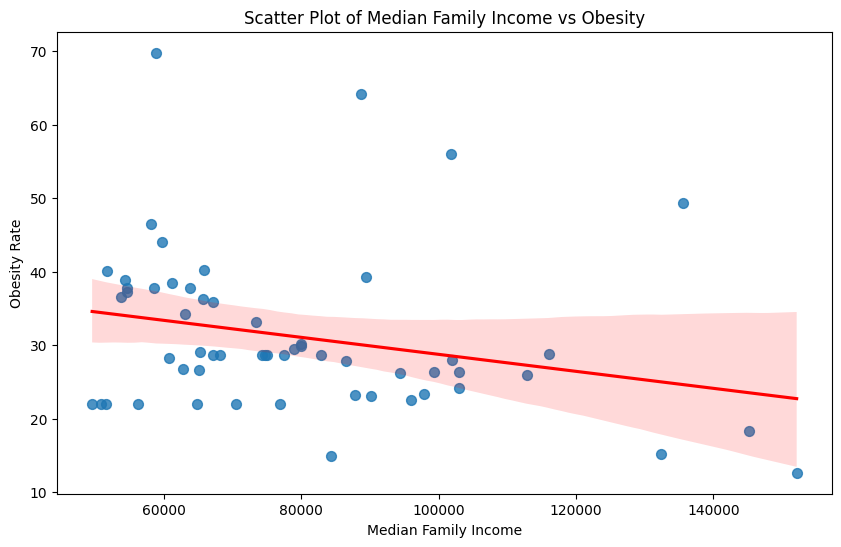

(-1.8003535937100101, 0.07728949955893785)

In [ ]:
# 1. Correlation Analysis
income_obesity_corr = data[['Median_Family_Income', 'Obese']].corr().iloc[0, 1]
print(f"Correlation between Median Family Income and Obesity: {income_obesity_corr}")

# 2. Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Median_Family_Income', y='Obese', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Median Family Income vs Obesity')
plt.xlabel('Median Family Income')
plt.ylabel('Obesity Rate')
plt.show()

# 3. Descriptive Statistics
income_obesity_stats = data[['Median_Family_Income', 'Obese']].describe()
income_obesity_stats

# 4. T-Test
# Calculate the median income to split the data
median_income = data['Median_Family_Income'].median()

# Split the data into high income and low income groups
high_income_group = data[data['Median_Family_Income'] > median_income]
low_income_group = data[data['Median_Family_Income'] <= median_income]

# Perform t-test on obesity rates between high income and low income groups
t_stat, p_val = stats.ttest_ind(high_income_group['Obese'], low_income_group['Obese'], nan_policy='omit')

# Results
t_stat, p_val

T-Test Analysis

t-statistic: -1.800
p-value: 0.077

Indicates no strong evidence of a significant difference in obesity rates between high-income and low-income counties at the 5% level but suggests marginal significance at the 10% level.